# Task 0: Recognize facial expressions

## (1).	Load data and visualize images. 

In [1]:
import numpy as np
import pandas as pd

fer2013 = pd.read_csv('./dataset_for_task0/fer2013_7k.csv')[['emotion', 'pixels']] 
fer2013['pixels'] = fer2013['pixels'].apply(lambda x: np.array(x.split()).astype(int))

num_of_dataset = len(fer2013)
print(f"The number of dataset is {num_of_dataset}")

The number of dataset is 6999


Label: anger


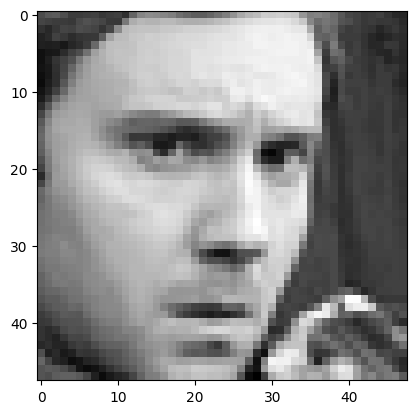

In [3]:
import cv2
import matplotlib.pyplot as plt

emotion_label_to_text = {
    0: 'anger', 1: 'disgust', 
    2: 'fear', 3: 'happiness', 
    4: 'sadness', 5: 'surprise', 
    6: 'neutral'
}

# randomly select one image
img = fer2013['pixels'][0].reshape(48,48)
plt.imshow(img, cmap="gray")
print('Label: {0}'.format(emotion_label_to_text[fer2013['emotion'][0]]))

## (2). Train classification model with logistic regression algorithm on training set and evaluate the model on test set.
- define the Logistic Regression model with solver='sag'
- Train the model on the training set, and evaluate it on the test set.
- Calculate the accuracy on each catagory.

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [5]:
from sklearn import linear_model

dfTrain = fer2013.iloc[:-1000] # 训练集
dfTest = fer2013.iloc[-1000:] # 测试集

y = dfTrain['emotion'].values.flatten() # 
x = np.vstack(dfTrain['pixels'].values)

# TODO: train the model

######## your code ########
model = linear_model.LogisticRegression(solver='sag')
model.fit(x, y)
######## your code ########

C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(solver='sag')

In [6]:
# TODO: predict outputs on test set

######## your code ########
y_test_pred = model.predict(np.vstack(dfTest['pixels'].values))
######## your code ########

In [7]:
# TODO: calculate the accuracy
# Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
from sklearn import metrics

######## your code ########
accuracy = metrics.accuracy_score(dfTest.emotion, y_test_pred)
print(f'Accuracy: {accuracy}')

# get confusion matrix
matrix = metrics.confusion_matrix(dfTest.emotion, y_test_pred)
print(f'Confusion matrix:\n{matrix}')

# calculate the accuracy and print it
accuracy_each_class = metrics.classification_report(dfTest.emotion, y_test_pred, target_names=emotion_label_to_text.values())
print(accuracy_each_class)

######## your code ########

Accuracy: 0.316
Confusion matrix:
[[ 26   1  16  36  16  14  26]
 [  0   0   4   2   4   1   5]
 [ 21   0  23  48  14  22  29]
 [ 24   0  18 146  30  11  18]
 [ 29   0  21  47  36  11  38]
 [ 13   0  15  24  12  42  12]
 [ 17   0  17  43  14  11  43]]
              precision    recall  f1-score   support

       anger       0.20      0.19      0.20       135
     disgust       0.00      0.00      0.00        16
        fear       0.20      0.15      0.17       157
   happiness       0.42      0.59      0.49       247
     sadness       0.29      0.20      0.23       182
    surprise       0.38      0.36      0.37       118
     neutral       0.25      0.30      0.27       145

    accuracy                           0.32      1000
   macro avg       0.25      0.25      0.25      1000
weighted avg       0.30      0.32      0.30      1000


## 3. Try different parameters when training the Logistic Regression model
Requirement: Change the values of 'penalty' and 'C', re-train the model, and evaluate the accuracy.

penalty {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’
C: float, default=1.0

Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [8]:
for penalty in [ 'l2', 'None']:
    for c in [0.1, 0.2, 0.5, 1]:
        # TODO: calculate the accuracy
        model = linear_model.LogisticRegression(solver='sag', penalty=penalty, C=c)
        model.fit(x, y)
        y_test_pred = model.predict(np.vstack(dfTest['pixels'].values))
        print(penalty, c, metrics.accuracy_score(dfTest['emotion'].values, y_test_pred))

C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


l2 0.1 0.316


C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


l2 0.2 0.316


C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


l2 0.5 0.315


C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


l2 1 0.317


C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


none 0.1 0.316


C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_logistic.py:1192: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


none 0.2 0.315


C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_logistic.py:1182: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


none 0.5 0.315
none 1 0.317


C:\Users\biao8\anaconda3\envs\EE5112\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
